In [1]:
#wind power generation forcasting


In [2]:
pip install pandas numpy 


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install xgboost




In [4]:
!pip install scikit-learn==1.3.0

In [5]:
import pandas as pd #used for data manipulation 
import numpy as np #numerical calculation like vector scalar tensor,linear algebra
import matplotlib.pyplot as plt#visualisation library
import seaborn as sns #advanced data visualization library
from sklearn.model_selection import train_test_split#sk-learn machine learning
from sklearn.preprocessing import StandardScaler #scaling

In [6]:
#lOAD THE FILES
location1=pd.read_csv('Location1.csv')
location2=pd.read_csv('Location2.csv')
location3=pd.read_csv('Location3.csv')
location4=pd.read_csv('Location4.csv')

In [7]:
location1.head() #show top5 rows,we can also pass paraameter eg to see 10 rows

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  02-01-2017 00:00            28.5                   85         24.5   
1  02-01-2017 01:00            28.4                   86         24.7   
2  02-01-2017 02:00            26.8                   91         24.5   
3  02-01-2017 03:00            27.4                   88         24.3   
4  02-01-2017 04:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  
0            1.4  0.1635  
1            4.4  0.1424  
2            3.2  0.1214  
3            1.6  0.1003  
4            4.0  0.0793

In [8]:
#add new column to identify the location
location1['Location']='Location1.csv'
location2['Location']='Location2.csv'
location3['Location']='Location3.csv'
location4['Location']='Location4.csv'
#concatenate to data frame
merged_data=pd.concat([location1,location2,location3,location4] ,ignore_index=True)
merged_data.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  02-01-2017 00:00            28.5                   85         24.5   
1  02-01-2017 01:00            28.4                   86         24.7   
2  02-01-2017 02:00            26.8                   91         24.5   
3  02-01-2017 03:00            27.4                   88         24.3   
4  02-01-2017 04:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power       Location  
0            1.4  0.1635  Location1.csv  
1            4.4  0.1424  Location1.csv  
2            3.2  0.1214  Location1.csv  
3            1.6  0.1003  Location1.csv  
4            4.0  0.0793  Location1.csv

In [9]:
merged_data.to_csv('merged_locations.csv',index=False)

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [11]:
#to check the statistics of dataset
merged_data.describe().T

count        mean         std   min       25%  \
temperature_2m       175200.0   46.655994   22.012738 -31.2   30.2000   
relativehumidity_2m  175200.0   70.155291   17.326678   9.0   57.0000   
dewpoint_2m          175200.0   36.516241   20.933153 -36.2   21.9000   
windspeed_10m        175200.0    4.157639    2.012682   0.0    2.6300   
windspeed_100m       175200.0    6.879334    3.043964   0.0    4.7000   
winddirection_10m    175200.0  201.589446   99.639040   1.0  130.0000   
winddirection_100m   175200.0  201.539070  100.683777   0.0  129.0000   
windgusts_10m        175200.0    8.038205    3.617488   0.5    5.3000   
Power                175200.0    0.303429    0.257325   0.0    0.0877   

                          50%       75%       max  
temperature_2m        46.9000   65.3000  101.7000  
relativehumidity_2m   72.0000   84.0000  100.0000  
dewpoint_2m           36.2000   54.6000   78.7000  
windspeed_10m          3.8500    5.3800   18.5300  
windspeed_100m         6.6800    8.8000   24.5900  
winddirection_10m    211.0000  288.0000  360.0000  
winddirection_100m   211.0000  290.0000  360.0000  
windgusts_10m          7.6000   10.3000   29.2000  
Power                  0.2331    0.4742    0.9994

In [12]:
#check the missing values
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [13]:
#to check the duplicate value
merged_data.duplicated().sum()

0

In [14]:
# encoding coverting string(catagorical string) to nos
merged_data=pd.get_dummies(merged_data,columns=['Location'],drop_first=True)
merged_data.head()


Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  02-01-2017 00:00            28.5                   85         24.5   
1  02-01-2017 01:00            28.4                   86         24.7   
2  02-01-2017 02:00            26.8                   91         24.5   
3  02-01-2017 03:00            27.4                   88         24.3   
4  02-01-2017 04:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  Location_Location2.csv  Location_Location3.csv  \
0            1.4  0.1635                       0                       0   
1            4.4  0.1424                       0                       0   
2            3.2  0.1214                       0                       0   
3            1.6  0.1003                       0                       0   
4            4.0  0.0793                       0                       0   

   Location_Location4.csv  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [15]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power',
       'Location_Location2.csv', 'Location_Location3.csv',
       'Location_Location4.csv'],
      dtype='object')

In [16]:
merged_data.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  02-01-2017 00:00            28.5                   85         24.5   
1  02-01-2017 01:00            28.4                   86         24.7   
2  02-01-2017 02:00            26.8                   91         24.5   
3  02-01-2017 03:00            27.4                   88         24.3   
4  02-01-2017 04:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  Location_Location2.csv  Location_Location3.csv  \
0            1.4  0.1635                       0                       0   
1            4.4  0.1424                       0                       0   
2            3.2  0.1214                       0                       0   
3            1.6  0.1003                       0                       0   
4            4.0  0.0793                       0                       0   

   Location_Location4.csv  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [17]:
#week 2 :EDA exploratory data analysis

In [18]:
numerical_columns=merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2.csv',
       'Location_Location3.csv', 'Location_Location4.csv'],
      dtype='object')

In [19]:
merged_data.shape


(175200, 13)

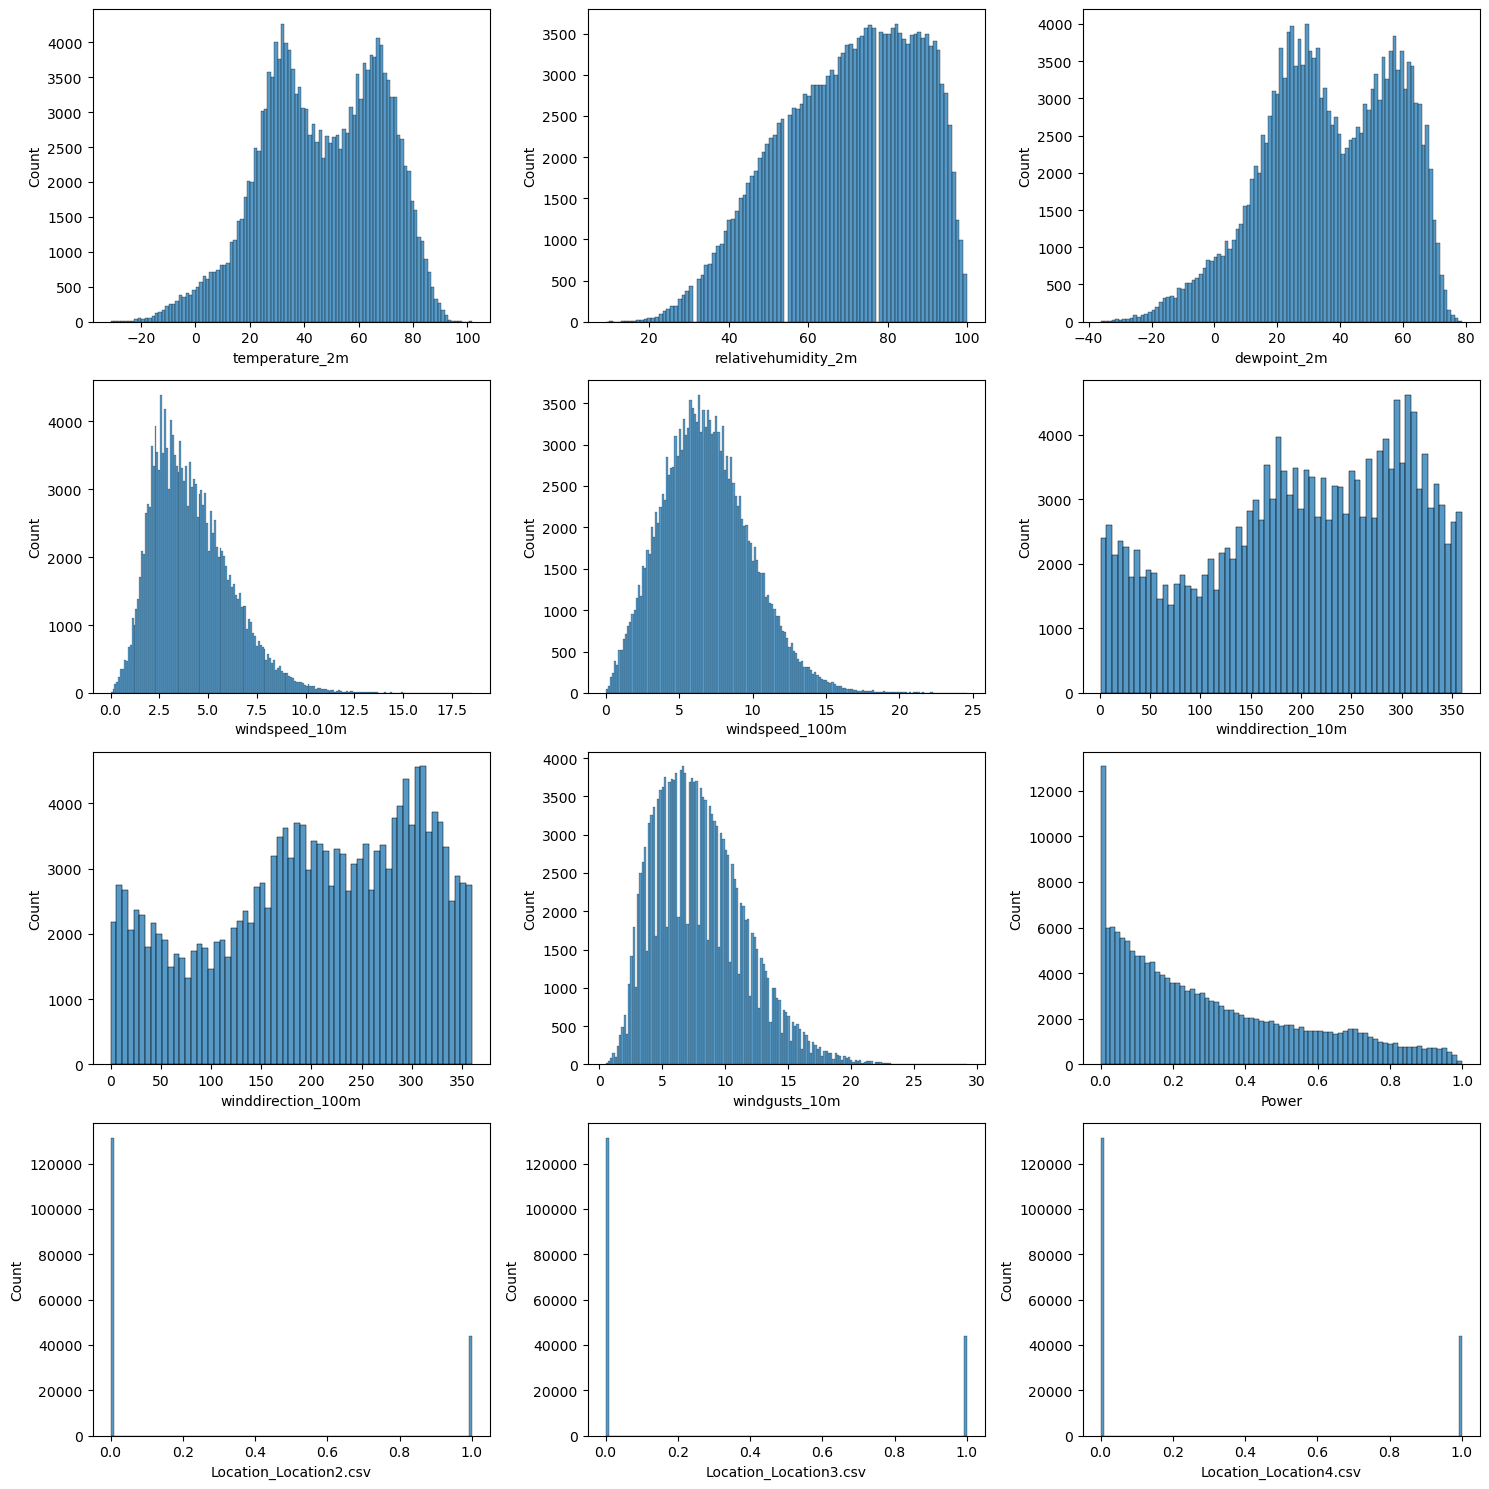

In [20]:
fig,axes=plt.subplots(4,3,figsize=(15,15))
axes=axes.flatten()#we have 2d rows so for that we have indices ,row/cols so coverting it into 1d
for i,col in enumerate(numerical_columns):
    sns.histplot(merged_data[col],ax=axes[i])
plt.tight_layout()
plt.show()

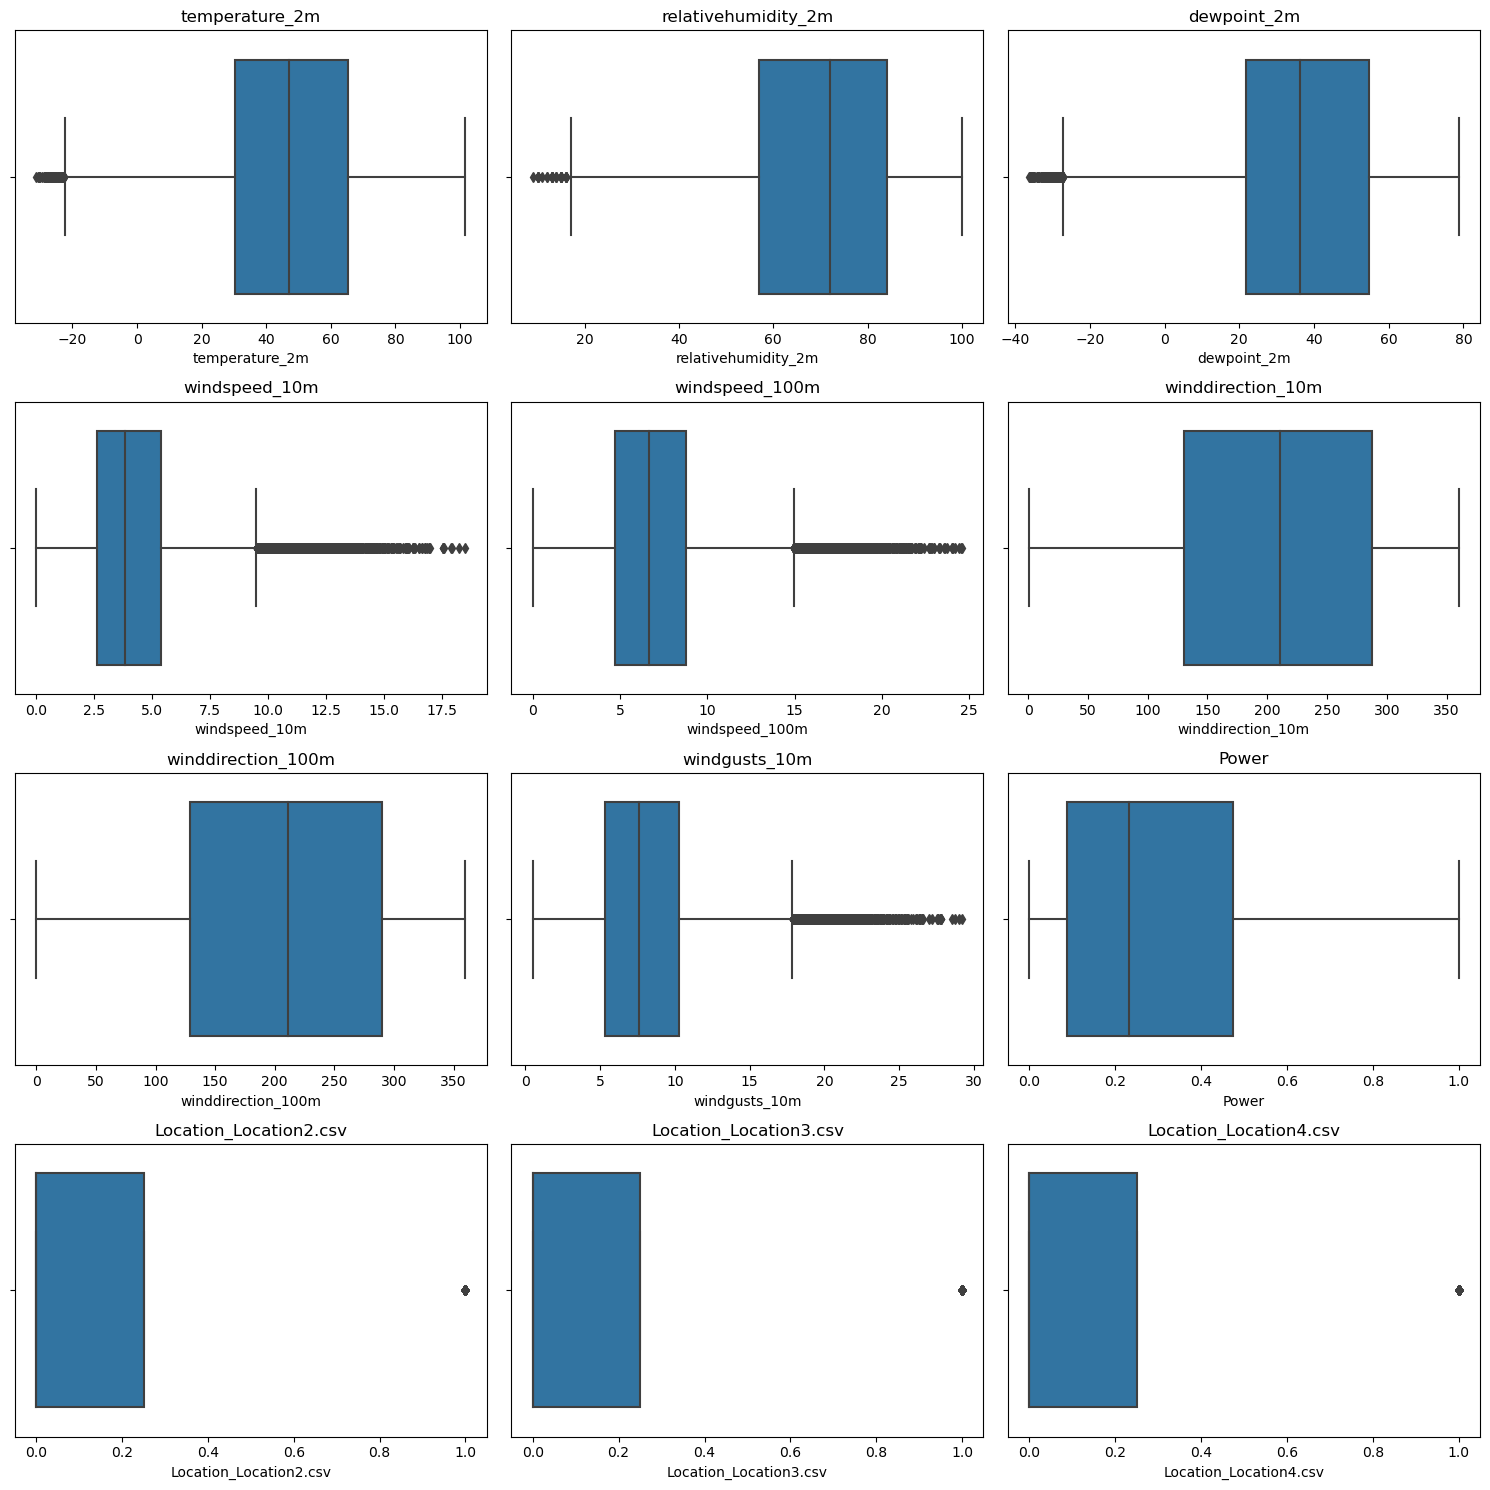

In [21]:
# Let's create box plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()
    

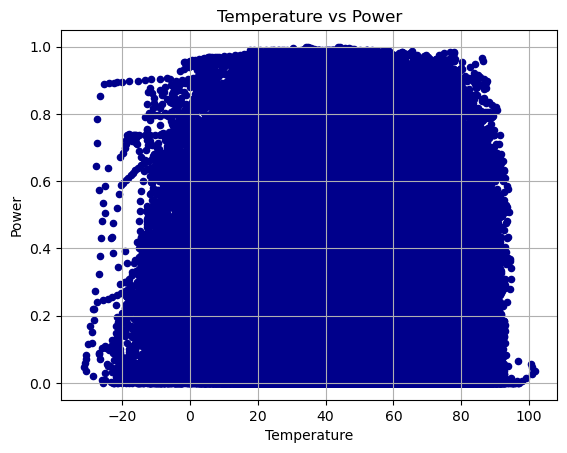

In [22]:
#lets use scatterplot to see relation between power and temp
merged_data.plot.scatter(x='temperature_2m',y='Power',c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

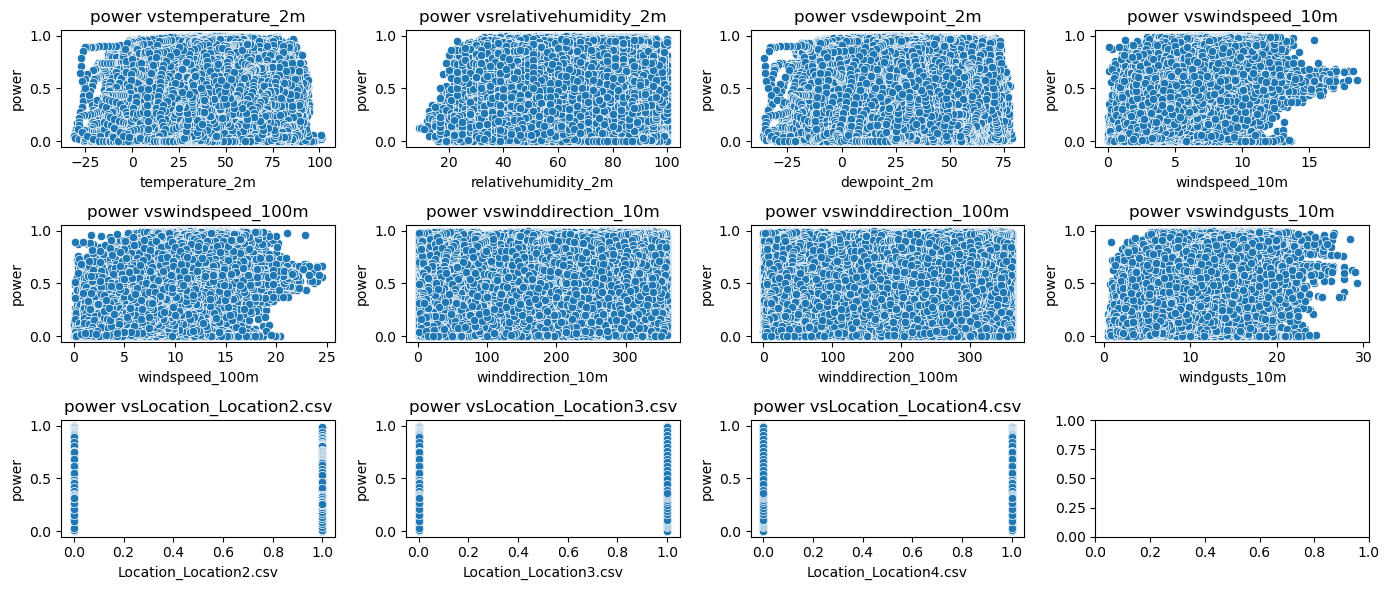

In [23]:
# creating multiple plots to see the relation bw diffrent cols and power
fig,axes=plt.subplots(3,4,figsize=(14,6))
axes=axes.flatten()
for i,col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col,y='Power',data=merged_data,ax=axes[i])
    axes[i].set_title(f'power vs{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('power')
plt.tight_layout()
plt.show()
    

<function matplotlib.pyplot.show(close=None, block=None)>

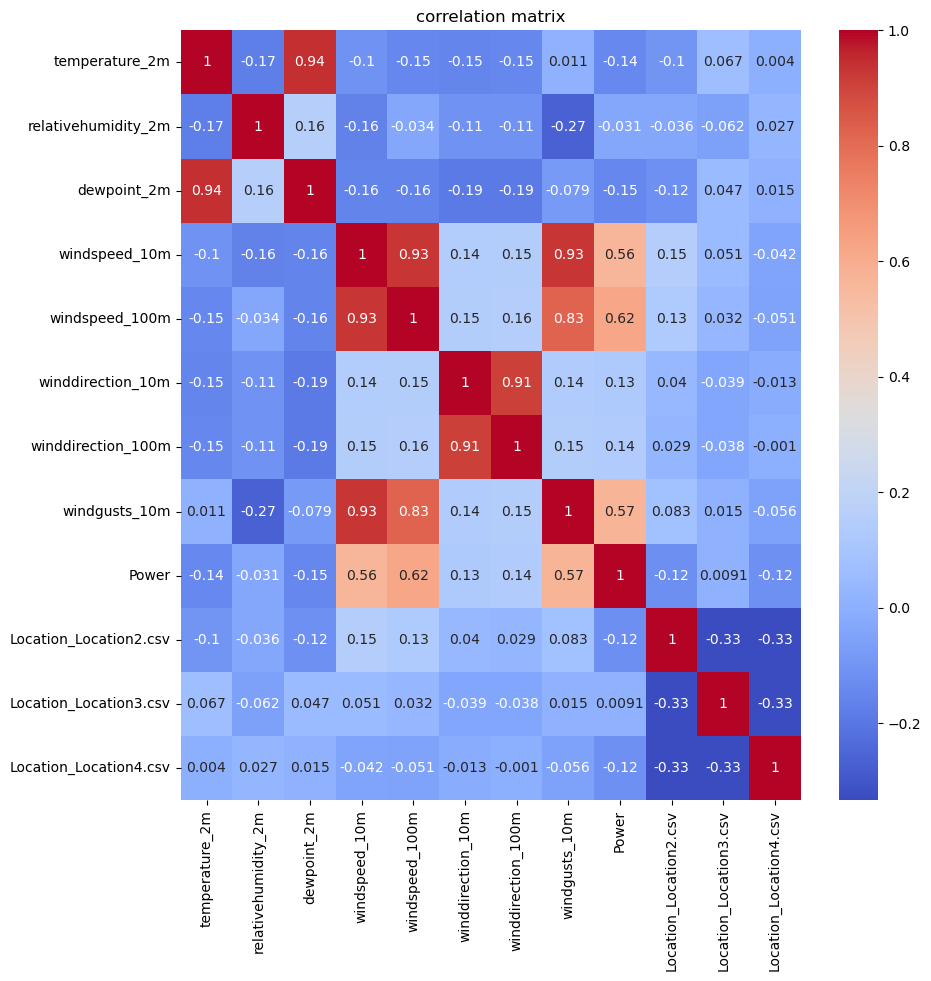

In [24]:
# check the correlation between the columns and power
correlation=merged_data[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show

In [25]:
print(merged_data.columns)


Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power',
       'Location_Location2.csv', 'Location_Location3.csv',
       'Location_Location4.csv'],
      dtype='object')


In [26]:
##data modelling and evalaute
# Convert index or datetime column to features
merged_data['timestamp'] = pd.to_datetime(merged_data['Time'])  # if you have a time column

# Add time-based features
merged_data['hour'] = merged_data['timestamp'].dt.hour
merged_data['month'] = merged_data['timestamp'].dt.month




In [27]:
X = merged_data.drop(['Power', 'timestamp', 'Time'], axis=1)
y = merged_data['Power']


In [28]:
# Split the data into training and test sets - 80% & 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [31]:
print(X)


        temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
0                 28.5                   85         24.5           1.44   
1                 28.4                   86         24.7           2.06   
2                 26.8                   91         24.5           1.30   
3                 27.4                   88         24.3           1.30   
4                 27.3                   88         24.1           2.47   
...                ...                  ...          ...            ...   
175195            25.5                   94         24.0           4.01   
175196            25.3                   92         23.2           4.70   
175197            24.9                   90         22.5           4.61   
175198            24.9                   89         22.1           4.60   
175199            24.9                   88         21.8           4.65   

        windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
0                 1

In [32]:
# # Make the predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Absolute Error: {mae}')
# print(f'Mean Squared Error: {mse}')
# print(f'R Squared Score: {r2}')

In [33]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RF Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Let's predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.09763752868150685
RF MSE: 0.018238955311654082
RF R2 Score: 0.7269391873265564


In [35]:
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from sklearn.model_selection import train_test_split

# # Train the model
# xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
# xgb.fit(X_train, y_train)

# # Predict
# y_pred_xgb = xgb.predict(X_test)

# # Evaluate
# print("XGBoost R2 score:", r2_score(y_test, y_pred_xgb))
# print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
# print("MSE:", mean_squared_error(y_test, y_pred_xgb))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


In [36]:
input_data = [[28.4, 86, 24.7, 2.06, 3.99, 151, 158, 4.4, 0, 1, 0, 0, 6]]
scaled_input = scaler.transform(input_data)
predicted_output = rf_model.predict(scaled_input)
print(f"Predicted Wind Power Output: {predicted_output[0]:.2f} MW")

Predicted Wind Power Output: 0.19 MW


C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
# saving the predicted model
import pickle 
data = {
    'model': rf_model,
    'scaler': scaler
}

with open('windpower.sav', 'wb') as file:
    pickle.dump(data, file)
with open('windpower.sav', 'rb') as file:
    data = pickle.load(file)

model = data['model']
scaler = data['scaler']

# New input (replace with actual values as per your model)
input_data = [[28.4, 86, 24.7, 2.06, 3.99, 151, 158, 4.4, 0, 1, 0, 0, 6]]

# Scale the input
scaled_input = scaler.transform(input_data)

# Predict
predicted_output = model.predict(scaled_input)

print(f"Predicted Wind Power Output: {predicted_output[0]:.2f} MW")

Predicted Wind Power Output: 0.19 MW


C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
import gzip
import shutil

# Compress the .sav file
with open("windpower.sav", "rb") as f_in:
    with gzip.open("windpower.sav.gz", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Model compressed successfully into 'windpower.sav.gz'")


Model compressed successfully into 'windpower.sav.gz'
